<a href="https://colab.research.google.com/github/Shlok-Agarwal-7/ML-Models/blob/Titanic/ML_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis


In [3]:
Train=pd.read_csv("/content/train.csv")
Test=pd.read_csv("/content/test.csv")
Train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
print(Train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
print(pd.isnull(Train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Visualization


female survived 74.20382165605095
male survived 18.890814558058924


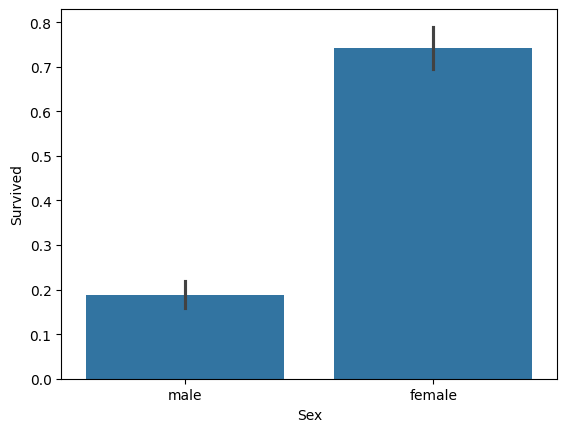

In [ ]:
sns.barplot(x='Sex',y='Survived',data=Train)

print("female survived",Train['Survived'][Train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print("male survived",Train['Survived'][Train['Sex']=='male'].value_counts(normalize=True)[1]*100)

first class 62.96296296296296
first class 47.28260869565217
first class 24.236252545824847


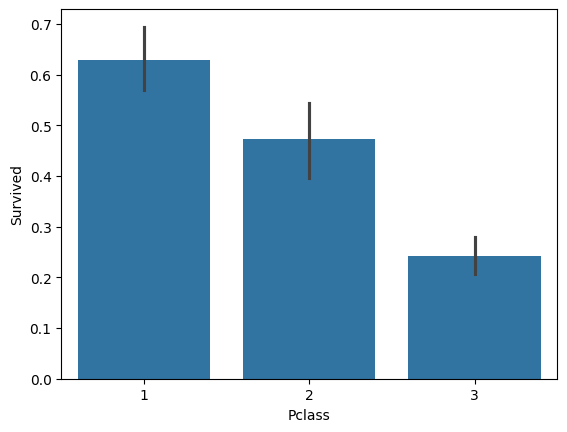

In [11]:
sns.barplot(x='Pclass',y='Survived',data=Train)

print("first class",Train['Survived'][Train['Pclass']==1].value_counts(normalize=True)[1]*100)
print("first class",Train['Survived'][Train['Pclass']==2].value_counts(normalize=True)[1]*100)
print("first class",Train['Survived'][Train['Pclass']==3].value_counts(normalize=True)[1]*100)

% survived class 0:  34.53947368421053
% survived class 1:  53.588516746411486
% survived class 2:  46.42857142857143


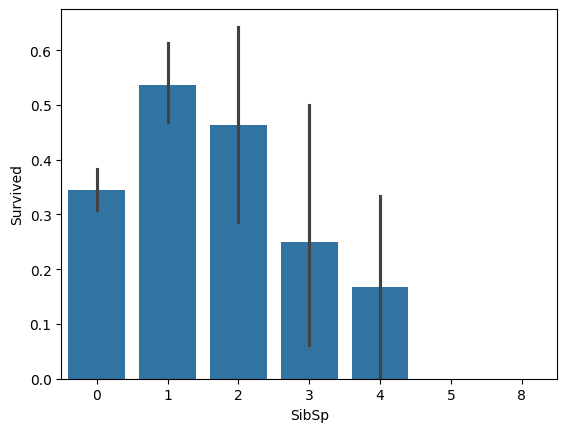

In [13]:
# SibSp bar plot
sns.barplot(x='SibSp', y='Survived', data=Train)

# % survived by class
print('% survived class 0: ', Train['Survived'][Train['SibSp'] == 0 ].value_counts(normalize=True)[1]*100)
print('% survived class 1: ', Train['Survived'][Train['SibSp'] == 1 ].value_counts(normalize=True)[1]*100)
print('% survived class 2: ', Train['Survived'][Train['SibSp'] == 2 ].value_counts(normalize=True)[1]*100)

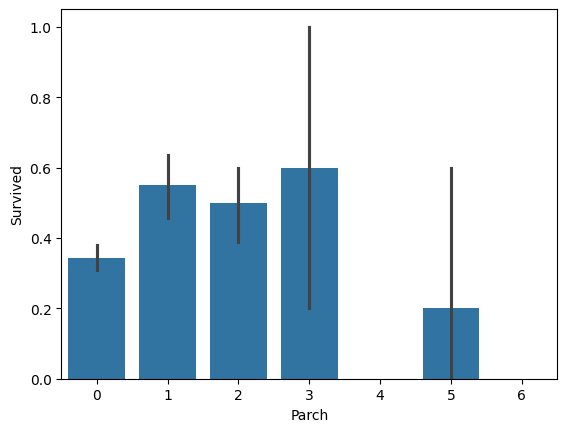

In [14]:
sns.barplot(x = 'Parch', y='Survived', data=Train)
plt.show()

cabin class=0 66.66666666666666
cabin class=1 29.985443959243085


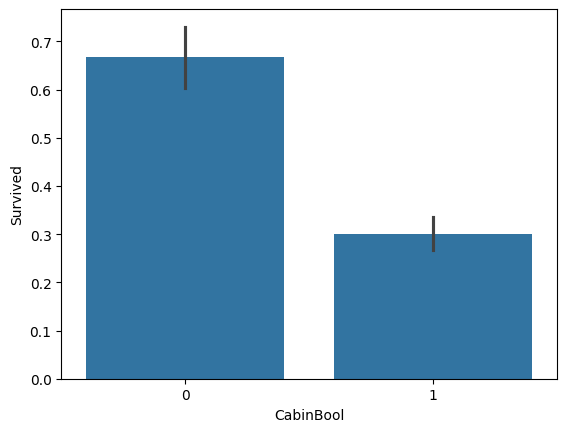

In [17]:
Train['CabinBool']=Train['Cabin'].isnull().astype(int)
Test['CabinBool']=Test['Cabin'].isnull().astype(int)

sns.barplot(x=Train['CabinBool'],y=Train['Survived'])

print("cabin class=0",Train[Train['CabinBool']==0]['Survived'].value_counts(normalize=True)[1]*100)
print("cabin class=1",Train[Train['CabinBool']==1]['Survived'].value_counts(normalize=True)[1]*100)


# Data Cleanup


<Axes: xlabel='AgeGroup', ylabel='Survived'>

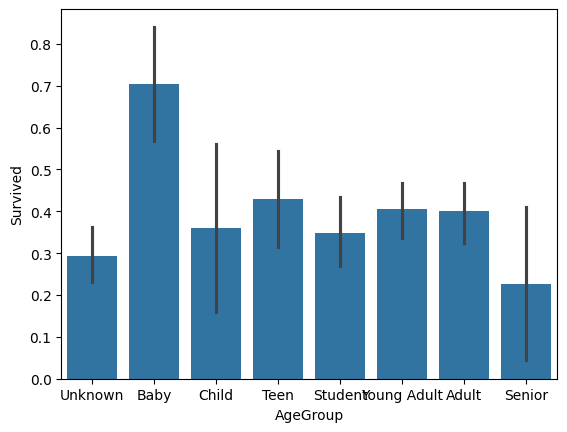

In [19]:
Train['Age']=Train['Age'].fillna(-0.5)
Test['Age']=Test['Age'].fillna(-0.5)

bin=[-1,0,5,12,18,24,35,60,np.inf]
labels=["Unknown","Baby","Child","Teen","Student","Young Adult","Adult","Senior"]

Train['AgeGroup']=pd.cut(Train['Age'],bin,labels=labels)
Test['AgeGroup']=pd.cut(Test['Age'],bin,labels=labels)

sns.barplot(x='AgeGroup',y='Survived',data=Train)